In [1]:
import numpy as np
import pandas as pd
import os
name=os.path.abspath(r'E:\sintel\all\final2bbb.csv')
dfresult = pd.read_csv(name, on_bad_lines='skip')

In [2]:
dfresult 

,frame,Target_br,SI,TI,PSNR,PSNR_Category,Resolution_category
0,2,3000,0.000000,0.000000,100.000000,5,4
1,3,3000,0.000000,0.000000,100.000000,5,4
2,4,3000,3.962502,3.974672,57.861015,5,4
3,5,3000,8.398481,4.501360,53.004879,5,4
4,6,3000,10.586935,2.197968,50.023628,5,4
...,...,...,...,...,...,...,...
2816989,19034,900,0.000000,0.000000,100.000000,5,5
2816990,19035,900,0.000000,0.000000,100.000000,5,5
2816991,19036,900,0.000000,0.000000,100.000000,5,5
2816992,19037,900,0.000000,0.000000,100.000000,5,5


In [10]:
dfresultfiltred[(dfresult['frame'] == 490) & (dfresult['Target_br'] == 100)]

,frame,Target_br,SI,TI,PSNR,PSNR_Category,Resolution_category
5845646,490,100,13.509248,3.976727,25.269701,2,5
5866763,490,100,13.509248,3.976727,27.519281,3,4
5887880,490,100,13.509248,3.976727,32.179291,3,3
5908997,490,100,13.509248,3.976727,33.614296,4,2
5930114,490,100,13.509248,3.976727,33.785862,4,1
16404146,490,100,13.509248,3.976727,25.269701,2,5
16425263,490,100,13.509248,3.976727,27.519281,3,4
16446380,490,100,13.509248,3.976727,32.179291,3,3
16467497,490,100,13.509248,3.976727,33.614296,4,2
16488614,490,100,13.509248,3.976727,33.785862,4,1


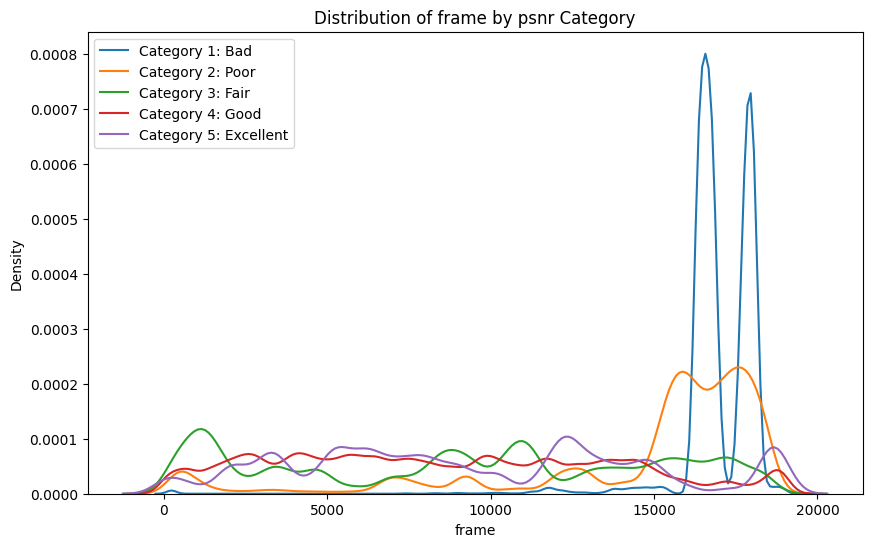

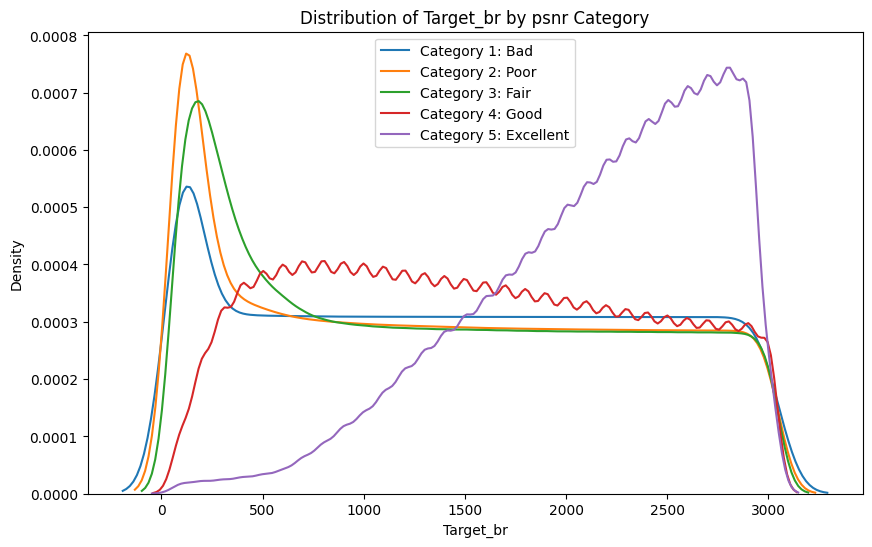

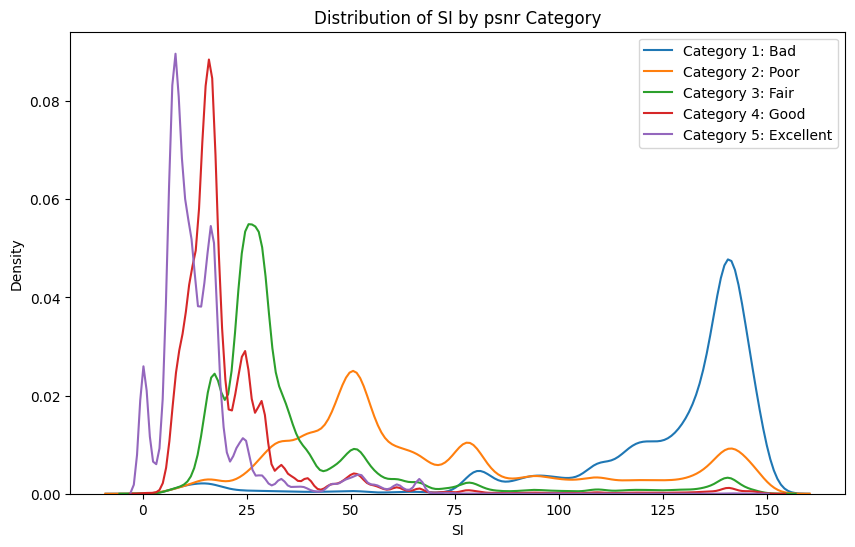

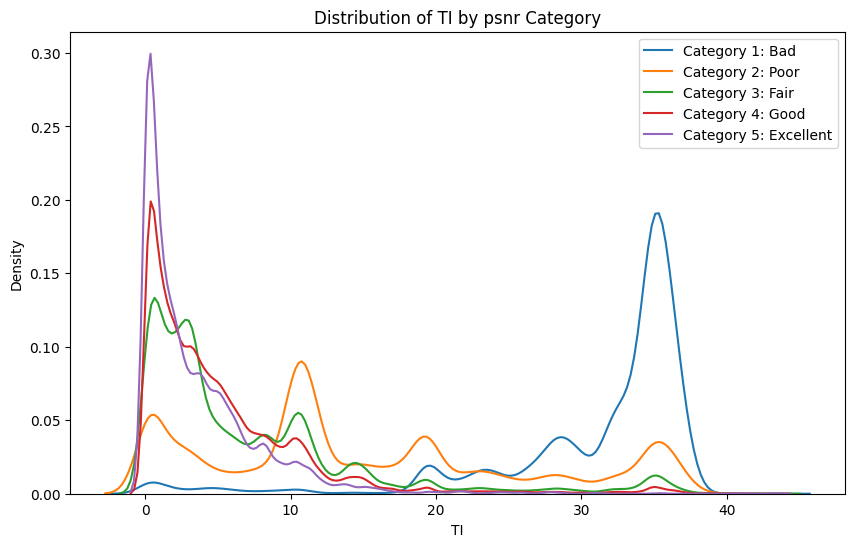

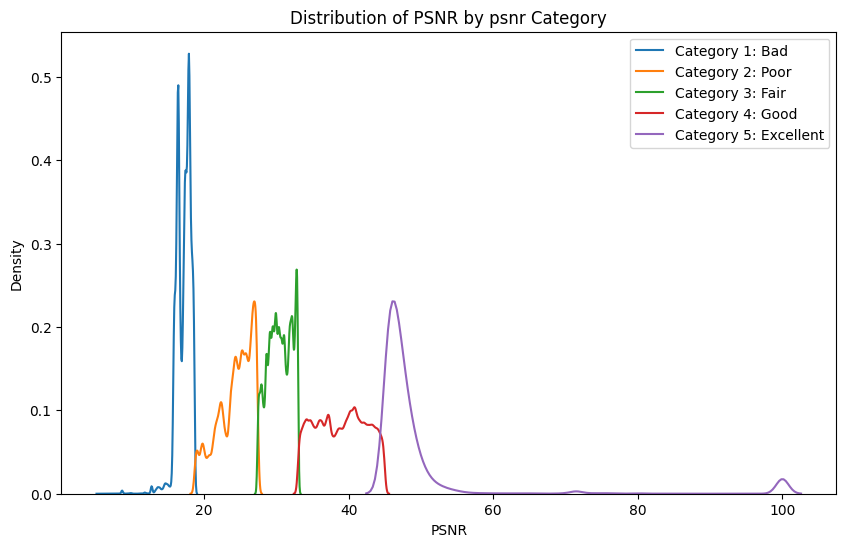

C:\Users\DELL\AppData\Local\Temp\ipykernel_8796\4200799446.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(a1[col], label='Category 1: Bad')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8796\4200799446.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(a2[col], label='Category 2: Poor')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8796\4200799446.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(a3[col], label='Category 3: Fair')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8796\4200799446.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(a4[col], label='Category 4: Good')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8796\4200799446.py:18: UserWarning

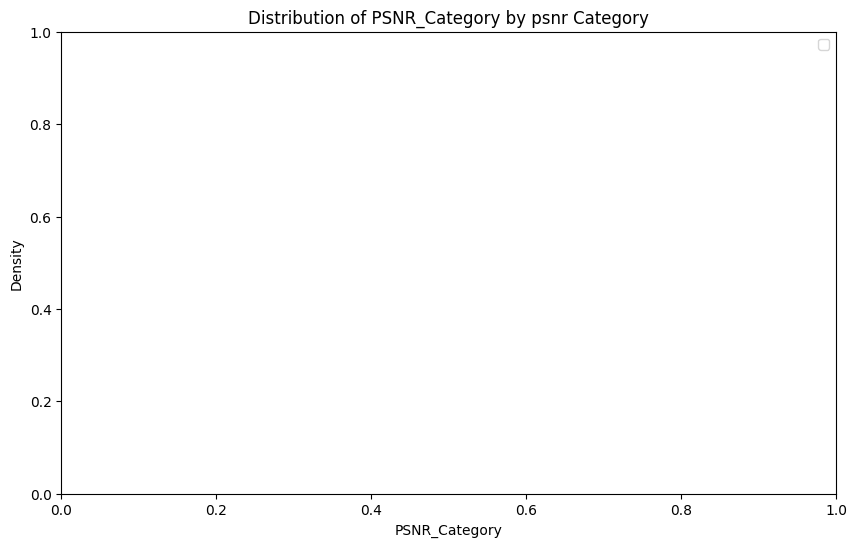

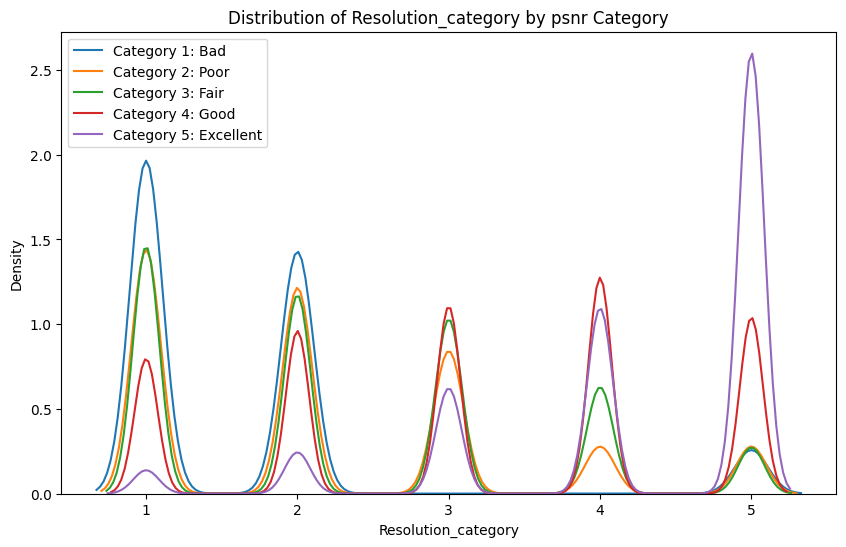

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filtrer les données par catégorie PSNR
a1 = dfresult[dfresult['PSNR_Category'] == 1]
a2 = dfresult[dfresult['PSNR_Category'] == 2]
a3 = dfresult[dfresult['PSNR_Category'] == 3]
a4 = dfresult[dfresult['PSNR_Category'] == 4]
a5 = dfresult[dfresult['PSNR_Category'] == 5]

# Parcourir les colonnes du dataframe
for col in dfresult.columns:
    plt.figure(figsize=(10, 6))  # Taille du graphique
    # Tracer les distributions pour chaque catégorie avec des étiquettes
    sns.kdeplot(a1[col], label='Category 1: Bad')
    sns.kdeplot(a2[col], label='Category 2: Poor')
    sns.kdeplot(a3[col], label='Category 3: Fair')
    sns.kdeplot(a4[col], label='Category 4: Good')
    sns.kdeplot(a5[col], label='Category 5: Excellent')
    plt.legend()  # Ajouter une légende
    plt.title(f'Distribution of {col} by psnr Category')  # Titre du graphique
    plt.xlabel(col)  # Nom de l'axe des x
    plt.ylabel('Density')  # Nom de l'axe des y
    plt.show()  # Afficher le graphique

In [4]:
a4.shape

(1654856, 7)

In [5]:
a5.shape

(290355, 7)

In [6]:
# Fusionner les deux sous-ensembles
a45 = pd.concat([a4, a5])

# Calculer les quantiles à 75% pour SI et TI
si_q75 = a45['SI'].quantile(0.75)
ti_q75 = a45['TI'].quantile(0.75)

print("Limite SI (75%) :", si_q75)
print("Limite TI (75%) :", ti_q75)

Limite SI (75%) : 22.725562497959523
Limite TI (75%) : 6.67500537345351


In [11]:
dfresult=dfresult[(dfresult['Resolution_category'] == 5)] # & (dfresult['Target_br'] == 100)
a1 = dfresult[dfresult['PSNR_Category'] == 1]
a2 = dfresult[dfresult['PSNR_Category'] == 2]
a3 = dfresult[dfresult['PSNR_Category'] == 3]
a4 = dfresult[dfresult['PSNR_Category'] == 4]
a5 = dfresult[dfresult['PSNR_Category'] == 5]
# Fusionner les deux sous-ensembles
a45 = pd.concat([a4, a5])

# Calculer les quantiles à 75% pour SI et TI
si_q75 = a45['SI'].quantile(0.75)
ti_q75 = a45['TI'].quantile(0.75)

print("Limite SI (75%) :", si_q75)
print("Limite TI (75%) :", ti_q75)

Limite SI (75%) : 29.42023645856836
Limite TI (75%) : 8.849968407439235


In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample

# --- load ---
df = dfresult.copy()

# --- truth ---
df['y'] = (df['PSNR_Category'] >= 4).astype(int)  # 1 = good/excellent

# --- candidate thresholds from 75th percentile on good/excellent ---
df_good = df[df['y'] == 1]
si_thr = df_good['SI'].quantile(0.75)
ti_thr = df_good['TI'].quantile(0.75)

print("SI_thr (75%):", si_thr, "TI_thr (75%):", ti_thr)

# --- evaluate simple rules ---
def eval_rule(pred):
    cm = confusion_matrix(df['y'], pred)
    prec = precision_score(df['y'], pred, zero_division=0)
    rec = recall_score(df['y'], pred)
    f1 = f1_score(df['y'], pred)
    acc = (df['y']==pred).mean()
    return {'cm':cm,'precision':prec,'recall':rec,'f1':f1,'acc':acc}

pred_and = ((df['SI'] <= si_thr) & (df['TI'] <= ti_thr)).astype(int)
pred_or  = ((df['SI'] <= si_thr) | (df['TI'] <= ti_thr)).astype(int)
pred_si  = (df['SI'] <= si_thr).astype(int)
pred_ti  = (df['TI'] <= ti_thr).astype(int)

print("AND:", eval_rule(pred_and))
print("OR:", eval_rule(pred_or))
print("SI-only:", eval_rule(pred_si))
print("TI-only:", eval_rule(pred_ti))

# --- ROC + Youden for SI and TI separately ---
fpr_si, tpr_si, thr_si = roc_curve(df['y'], -df['SI'])  # negative because lower SI => better
youden_si = tpr_si - fpr_si
opt_idx_si = np.argmax(youden_si)
opt_si = -thr_si[opt_idx_si]
print("Optimal SI (Youden):", opt_si)

fpr_ti, tpr_ti, thr_ti = roc_curve(df['y'], -df['TI'])
youden_ti = tpr_ti - fpr_ti
opt_idx_ti = np.argmax(youden_ti)
opt_ti = -thr_ti[opt_idx_ti]
print("Optimal TI (Youden):", opt_ti)

# --- Logistic Regression (SI + TI) ---
X = df[['SI','TI']].values
y = df['y'].values
clf = LogisticRegression(solver='liblinear')
clf.fit(X,y)
y_pred_proba = clf.predict_proba(X)[:,1]
fpr, tpr, th = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr,tpr)
print("Logistic AUC:", roc_auc)
# threshold for desired operating point
opt_idx = np.argmax(tpr - fpr)
opt_prob_thr = th[opt_idx]
print("Logistic opt prob thr:", opt_prob_thr)

# produce simple decision using logistic at opt_prob
pred_log = (y_pred_proba >= opt_prob_thr).astype(int)
print("Logistic eval:", eval_rule(pred_log))

# --- bootstrap for CI of quantiles and metrics ---
n_boot = 1000
si_thr_boot = []
ti_thr_boot = []
prec_boot = []
for i in range(n_boot):
    sample = resample(df, replace=True, n_samples=len(df))
    sample_good = sample[sample['y']==1]
    if len(sample_good) < 10:
        continue
    si_thr_boot.append(sample_good['SI'].quantile(0.75))
    ti_thr_boot.append(sample_good['TI'].quantile(0.75))
    pred = ((sample['SI'] <= np.quantile(sample_good['SI'], 0.75)) & 
            (sample['TI'] <= np.quantile(sample_good['TI'], 0.75))).astype(int)
    prec_boot.append(precision_score(sample['y'], pred, zero_division=0))

print("SI_thr CI:", np.percentile(si_thr_boot, [2.5,50,97.5]))
print("TI_thr CI:", np.percentile(ti_thr_boot, [2.5,50,97.5]))
print("Precision CI:", np.percentile(prec_boot, [2.5,50,97.5]))

# --- cross-video validation (train on BBB, test on Sintel) ---
train = df[df['video']=='BBB']
test  = df[df['video']=='Sintel']
si_thr_train = train[train['y']==1]['SI'].quantile(0.75)
ti_thr_train = train[train['y']==1]['TI'].quantile(0.75)
pred_test = ((test['SI'] <= si_thr_train) & (test['TI'] <= ti_thr_train)).astype(int)
print("Test on Sintel, metrics:", eval_rule(pred_test))


SI_thr (75%): 22.9157441958217 TI_thr (75%): 10.3230875293839
AND: {'cm': array([[ 5470318,   357046],
       [ 8592432, 12331192]], dtype=int64), 'precision': 0.9718600801781934, 'recall': 0.5893430315895564, 'f1': 0.7337404872125204, 'acc': 0.6654524311401134}
OR: {'cm': array([[ 3140994,  2686370],
       [ 1868246, 19055378]], dtype=int64), 'precision': 0.8764418573888355, 'recall': 0.9107111655227603, 'f1': 0.8932479482424295, 'acc': 0.8297402697799423}
SI-only: {'cm': array([[ 5400560,   426804],
       [ 5229940, 15693684]], dtype=int64), 'precision': 0.973524126564903, 'recall': 0.750046167910492, 'f1': 0.8472970819222229, 'acc': 0.7885407447381009}
TI-only: {'cm': array([[ 3210752,  2616612],
       [ 5230738, 15692886]], dtype=int64), 'precision': 0.857089910384217, 'recall': 0.7500080292018247, 'f1': 0.7999815054228924, 'acc': 0.7066519561819549}
Optimal SI (Youden): 24.4198649107774
Optimal TI (Youden): 14.8491947087597
Logistic AUC: 0.9049648744654308
Logistic opt prob thr

KeyboardInterrupt: 

[INFO] Nombre total de segments: 548274
[INFO] Proportion Good/Excellent: 0.8995629922265145
[BASELINE] SI_75% = 29.42, TI_75% = 8.85
[BASELINE] Precision: 0.9168497315049039
[BASELINE] Recall   : 0.6702054107099048
[BASELINE] F1-score : 0.7743620678547793
[YOUDEN] Seuil SI = -22.67, AUC = 0.602
[YOUDEN] Seuil TI = -6.73, AUC = 0.582
[LOGISTIC] AUC = 0.599, Seuil proba optimal = 0.910
[TREE] Règle extraite:
|--- SI <= 22.95
|   |--- SI <= 11.84
|   |   |--- class: 1
|   |--- SI >  11.84
|   |   |--- class: 1
|--- SI >  22.95
|   |--- TI <= 18.83
|   |   |--- class: 1
|   |--- TI >  18.83
|   |   |--- class: 1

[BOOTSTRAP] SI_75% CI95%: [29.35860702 29.41740159 29.49061736]
[BOOTSTRAP] Precision CI95%: [0.91604187 0.91691042 0.91780781]


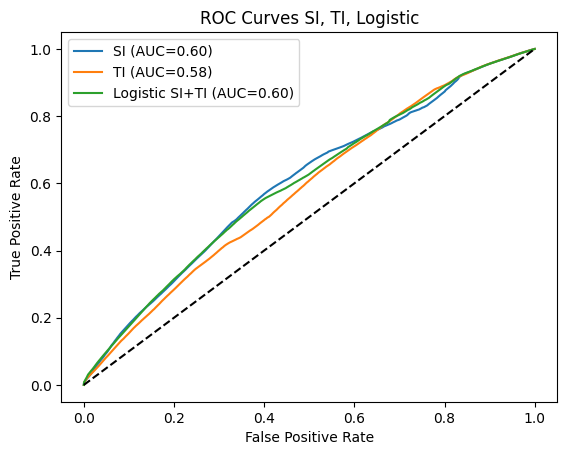

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.utils import resample
import matplotlib.pyplot as plt

# ============================
# 1. Charger les données
# ============================
# Ton DataFrame doit contenir au moins : 'SI', 'TI', 'PSNR_Category'
# On définit la qualité cible (Good=4, Excellent=5 => y=1)
df = dfresult.copy() # <-- change par ton fichier
df = df.dropna(subset=['SI','TI','PSNR_Category'])

df['y'] = df['PSNR_Category'].apply(lambda x: 1 if x >= 4 else 0)

print("[INFO] Nombre total de segments:", len(df))
print("[INFO] Proportion Good/Excellent:", df['y'].mean())

# ============================
# 2. Baseline: 75th percentile
# ============================
si_q75 = df[df['y']==1]['SI'].quantile(0.75)
ti_q75 = df[df['y']==1]['TI'].quantile(0.75)

print(f"[BASELINE] SI_75% = {si_q75:.2f}, TI_75% = {ti_q75:.2f}")

# Prédiction simple: règle AND
df['pred_q75'] = ((df['SI'] <= si_q75) & (df['TI'] <= ti_q75)).astype(int)
print("[BASELINE] Precision:", precision_score(df['y'], df['pred_q75']))
print("[BASELINE] Recall   :", recall_score(df['y'], df['pred_q75']))
print("[BASELINE] F1-score :", f1_score(df['y'], df['pred_q75']))

# ============================
# 3. ROC + Youden (univarié)
# ============================
def youden_threshold(y_true, scores, direction="low"):
    """Calcule le seuil optimal avec Youden (haut = mieux si direction=low)."""
    if direction == "low":  # plus petit = meilleure qualité
        scores = -scores
    fpr, tpr, thr = roc_curve(y_true, scores)
    youden = tpr - fpr
    idx = np.argmax(youden)
    return thr[idx], fpr, tpr, auc(fpr, tpr)

si_thr, si_fpr, si_tpr, si_auc = youden_threshold(df['y'], df['SI'], "low")
ti_thr, ti_fpr, ti_tpr, ti_auc = youden_threshold(df['y'], df['TI'], "low")

print(f"[YOUDEN] Seuil SI = {si_thr:.2f}, AUC = {si_auc:.3f}")
print(f"[YOUDEN] Seuil TI = {ti_thr:.2f}, AUC = {ti_auc:.3f}")

# ============================
# 4. Régression logistique (SI+TI)
# ============================
clf = LogisticRegression(solver='liblinear')
clf.fit(df[['SI','TI']], df['y'])
proba = clf.predict_proba(df[['SI','TI']])[:,1]

fpr, tpr, thr = roc_curve(df['y'], proba)
youden = tpr - fpr
opt_idx = np.argmax(youden)
prob_opt = thr[opt_idx]
auc_log = auc(fpr, tpr)

print(f"[LOGISTIC] AUC = {auc_log:.3f}, Seuil proba optimal = {prob_opt:.3f}")

# ============================
# 5. Arbre de décision simple
# ============================
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(df[['SI','TI']], df['y'])
print("[TREE] Règle extraite:")
print(export_text(dt, feature_names=['SI','TI']))

# ============================
# 6. Bootstrap pour CI
# ============================
n_boot = 200
si_thr_boot, prec_boot = [], []

for i in range(n_boot):
    sample = resample(df, replace=True)
    si_q75_b = sample[sample['y']==1]['SI'].quantile(0.75)
    si_thr_boot.append(si_q75_b)

    pred = ((sample['SI'] <= si_q75_b) & (sample['TI'] <= sample[sample['y']==1]['TI'].quantile(0.75))).astype(int)
    prec_boot.append(precision_score(sample['y'], pred, zero_division=0))

print("[BOOTSTRAP] SI_75% CI95%:", np.percentile(si_thr_boot, [2.5, 50, 97.5]))
print("[BOOTSTRAP] Precision CI95%:", np.percentile(prec_boot, [2.5, 50, 97.5]))

# ============================
# 7. Graphiques ROC
# ============================
plt.figure()
plt.plot(si_fpr, si_tpr, label=f"SI (AUC={si_auc:.2f})")
plt.plot(ti_fpr, ti_tpr, label=f"TI (AUC={ti_auc:.2f})")
plt.plot(fpr, tpr, label=f"Logistic SI+TI (AUC={auc_log:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curves SI, TI, Logistic")
plt.show()


[INFO] Nombre total de segments: 548274
[INFO] Proportion Good/Excellent: 0.8995629922265145
[BASELINE] SI_75% = 29.42, TI_75% = 8.85
[BASELINE] Precision: 0.9168497315049039
[BASELINE] Recall   : 0.6702054107099048
[BASELINE] F1-score : 0.7743620678547793
[YOUDEN] Seuil SI = -22.67, AUC = 0.602
[YOUDEN] Seuil TI = -6.73, AUC = 0.582
[LOGISTIC] AUC = 0.599, Seuil proba optimal = 0.910
[TREE] Règle extraite:
|--- SI <= 22.95
|   |--- SI <= 11.84
|   |   |--- class: 1
|   |--- SI >  11.84
|   |   |--- class: 1
|--- SI >  22.95
|   |--- TI <= 18.83
|   |   |--- class: 1
|   |--- TI >  18.83
|   |   |--- class: 1

[BOOTSTRAP] SI_75% CI95%: [29.36049899 29.42226658 29.49405333]
[BOOTSTRAP] Precision CI95%: [0.91600836 0.91688806 0.91777274]


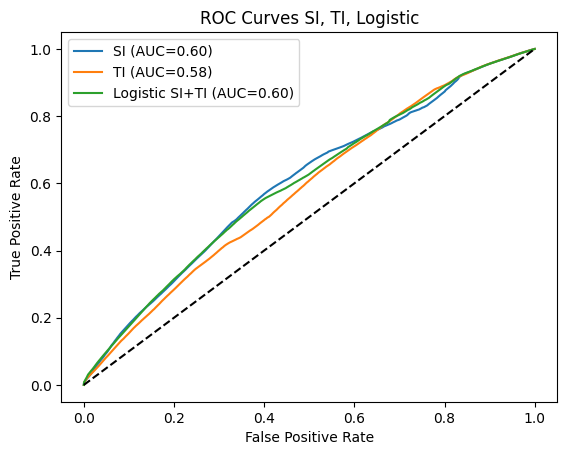

In [13]:
dfresult=dfresult[(dfresult['Resolution_category'] == 5)]
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.utils import resample
import matplotlib.pyplot as plt

# ============================
# 1. Charger les données
# ============================
# Ton DataFrame doit contenir au moins : 'SI', 'TI', 'PSNR_Category'
# On définit la qualité cible (Good=4, Excellent=5 => y=1)
df = dfresult.copy() # <-- change par ton fichier
df = df.dropna(subset=['SI','TI','PSNR_Category'])

df['y'] = df['PSNR_Category'].apply(lambda x: 1 if x >= 4 else 0)

print("[INFO] Nombre total de segments:", len(df))
print("[INFO] Proportion Good/Excellent:", df['y'].mean())

# ============================
# 2. Baseline: 75th percentile
# ============================
si_q75 = df[df['y']==1]['SI'].quantile(0.75)
ti_q75 = df[df['y']==1]['TI'].quantile(0.75)

print(f"[BASELINE] SI_75% = {si_q75:.2f}, TI_75% = {ti_q75:.2f}")

# Prédiction simple: règle AND
df['pred_q75'] = ((df['SI'] <= si_q75) & (df['TI'] <= ti_q75)).astype(int)
print("[BASELINE] Precision:", precision_score(df['y'], df['pred_q75']))
print("[BASELINE] Recall   :", recall_score(df['y'], df['pred_q75']))
print("[BASELINE] F1-score :", f1_score(df['y'], df['pred_q75']))

# ============================
# 3. ROC + Youden (univarié)
# ============================
def youden_threshold(y_true, scores, direction="low"):
    """Calcule le seuil optimal avec Youden (haut = mieux si direction=low)."""
    if direction == "low":  # plus petit = meilleure qualité
        scores = -scores
    fpr, tpr, thr = roc_curve(y_true, scores)
    youden = tpr - fpr
    idx = np.argmax(youden)
    return thr[idx], fpr, tpr, auc(fpr, tpr)

si_thr, si_fpr, si_tpr, si_auc = youden_threshold(df['y'], df['SI'], "low")
ti_thr, ti_fpr, ti_tpr, ti_auc = youden_threshold(df['y'], df['TI'], "low")

print(f"[YOUDEN] Seuil SI = {si_thr:.2f}, AUC = {si_auc:.3f}")
print(f"[YOUDEN] Seuil TI = {ti_thr:.2f}, AUC = {ti_auc:.3f}")

# ============================
# 4. Régression logistique (SI+TI)
# ============================
clf = LogisticRegression(solver='liblinear')
clf.fit(df[['SI','TI']], df['y'])
proba = clf.predict_proba(df[['SI','TI']])[:,1]

fpr, tpr, thr = roc_curve(df['y'], proba)
youden = tpr - fpr
opt_idx = np.argmax(youden)
prob_opt = thr[opt_idx]
auc_log = auc(fpr, tpr)

print(f"[LOGISTIC] AUC = {auc_log:.3f}, Seuil proba optimal = {prob_opt:.3f}")

# ============================
# 5. Arbre de décision simple
# ============================
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(df[['SI','TI']], df['y'])
print("[TREE] Règle extraite:")
print(export_text(dt, feature_names=['SI','TI']))

# ============================
# 6. Bootstrap pour CI
# ============================
n_boot = 200
si_thr_boot, prec_boot = [], []

for i in range(n_boot):
    sample = resample(df, replace=True)
    si_q75_b = sample[sample['y']==1]['SI'].quantile(0.75)
    si_thr_boot.append(si_q75_b)

    pred = ((sample['SI'] <= si_q75_b) & (sample['TI'] <= sample[sample['y']==1]['TI'].quantile(0.75))).astype(int)
    prec_boot.append(precision_score(sample['y'], pred, zero_division=0))

print("[BOOTSTRAP] SI_75% CI95%:", np.percentile(si_thr_boot, [2.5, 50, 97.5]))
print("[BOOTSTRAP] Precision CI95%:", np.percentile(prec_boot, [2.5, 50, 97.5]))

# ============================
# 7. Graphiques ROC
# ============================
plt.figure()
plt.plot(si_fpr, si_tpr, label=f"SI (AUC={si_auc:.2f})")
plt.plot(ti_fpr, ti_tpr, label=f"TI (AUC={ti_auc:.2f})")
plt.plot(fpr, tpr, label=f"Logistic SI+TI (AUC={auc_log:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curves SI, TI, Logistic")
plt.show()
